<h1> Data-Driven Donor Engagement in the Nonprofit Sector</h1>
<h3>Unlocking Insights with Segmentation and Impact Alignment</h3>

**Author:** Mahesh Pandey  
**Project Type:** Data Analytics | Nonprofit Sector | Business Data Analytics (IIBA-aligned)

<h2>1. Executive Summary</h2>

<p>
In a fast-changing fundraising landscape, nonprofit organisations are under increasing pressure to engage meaningfully with supporters, demonstrate measurable impact, and build trust through transparency. Traditional engagement approaches, often based on instinct or one-off campaigns, are no longer enough to meet the expectations of modern donors (Forbes Nonprofit Council, 2025).
</p>

<p>
This report explores how nonprofits can use data to improve donor engagement in a practical and strategic way. Using a realistic dataset that includes donor behaviour, campaign performance, and programme outcomes, the analysis highlights common challenges such as high donor attrition, underperforming campaigns, and inconsistent communication. It also offers ways forward—showing how data can support smarter segmentation, better decision-making, and stronger relationships (FundsforNGOs, 2025).
</p>

<p>
Embracing a data-informed approach is not just about technology—it is a cultural shift that aligns mission, message, and measurement. With the right mindset and use of existing tools, even small and mid-sized organisations can begin to use data to drive both supporter engagement and mission impact (Analytics for Good Institute, 2020).
</p>

<h2>2. Introduction: Why This Matters</h2>

<p>
Nonprofit organisations exist to create meaningful and measurable change—but in today’s complex landscape, their ability to deliver impact increasingly depends on how well they engage and retain supporters. As attention spans shorten and donor expectations rise, many nonprofits face persistent challenges in sustaining long-term relationships with their communities (Funraise, 2024). Research shows that not-for-profit organisations that use data effectively are up to three times more likely to achieve mission-aligned growth and build lasting stakeholder trust (McKinsey & Company, 2021).
</p>

<p>
Despite growing awareness of the benefits of data-driven engagement, many organisations continue to rely on instinct, legacy practices, or isolated campaign insights. Communications are often broadcast without clarity on audience relevance or timing, while fundraising outcomes are not consistently linked to programmatic impact. Donors may lapse quietly without strategic follow-up, and valuable insights remain locked away in spreadsheets or fragmented systems (Nonprofits Source, n.d.). As Andresen and Nowicki (2020) note, many nonprofits struggle to operationalise their data due to a lack of integration between strategy, systems, and staff capability.
</p>

<p>
This report demonstrates how nonprofits can move beyond instinct toward intentional, data-informed engagement. By applying practical analytics to a structured dataset that reflects real-world nonprofit activity, it highlights how behavioural data, campaign insights, and program outcomes can be aligned to improve donor relationships and increase mission impact.
</p>


<h2>3. About the Data</h2>

<p>
The dataset used in this report has been <strong>synthetically generated</strong> to reflect the structure, behaviour, and operational context of a nonprofit organisation focused on <em>youth and community welfare</em>. It includes relational tables representing donors, donations, campaigns, impact outcomes, and engagement history, allowing for a comprehensive, end-to-end analysis of supporter activity and organisational performance.
</p>

<p>
While the data is not sourced from a real organisation, it has been carefully modelled using realistic distributions, behaviours, and campaign types informed by sector research and engagement trends. Patterns such as donor attrition, varied giving behaviour, campaign underperformance, and regional impact discrepancies have all been incorporated to mirror challenges commonly observed in real-world nonprofits (Virtuous, 2024; FundsforNGOs, 2025).
</p>

<p>
The use of simulated data in this context allows for open and ethical analysis without compromising the privacy of real donors or the operational integrity of any specific organisation. At the same time, the analysis and insights generated remain grounded in sector practice and are intended to demonstrate the value of using data to inform engagement, communication, and decision-making in the nonprofit space.
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# display settings for consistent plot style
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 100

#base patch
base_path = 'C:/GitHub/donor-data-analytics/Data/'

# Load datasets
donors = pd.read_csv(base_path + 'donors.csv')
donations = pd.read_csv(base_path + 'donations.csv')
donations_linked = pd.read_csv(base_path + 'donations_linked.csv')
engagements = pd.read_csv(base_path + 'engagement_history.csv')
campaigns = pd.read_csv(base_path + 'campaigns.csv')
impact = pd.read_csv(base_path + 'impact.csv')

**3.1 Data Structure Overview**

<p>
The dataset is structured as a relational model, reflecting the interconnected components of a typical nonprofit organisation. It includes six primary tables, each representing a distinct part of the engagement and delivery ecosystem. These tables are designed to support a full analytical workflow—from donor profiling to campaign evaluation and impact reporting.
</p>

<ul>
  <li><strong>Donors:</strong> Contains information about individual supporters, including donor type, status (e.g., Active, Lapsed), region, and join date.</li>
  <li><strong>Donations:</strong> Records all monetary contributions made by donors, including donation amount, date, channel (e.g., online, event), and linked campaign.</li>
  <li><strong>Campaigns:</strong> Details each fundraising or outreach campaign, including type, duration, target and actual amounts raised, and campaign focus (e.g., mental health, education).</li>
  <li><strong>Impact:</strong> Captures reported outcomes of campaigns by region and metric (e.g., meals delivered, youth reached), allowing alignment between funding and mission delivery.</li>
  <li><strong>Engagement History:</strong> Tracks individual contact events (e.g., emails, phone calls) with donors, including channel, purpose, and donor response.</li>
  <li><strong>Relationships:</strong> All tables are linked by common keys, such as <code>DonorID</code> and <code>CampaignID</code>, enabling joined analysis across behavioural and operational dimensions.</li>
</ul>

<p>
This structure enables both descriptive and diagnostic analytics, supporting segmentation, engagement analysis, campaign effectiveness evaluation, and impact delivery assessment across regions and time periods.
</p>


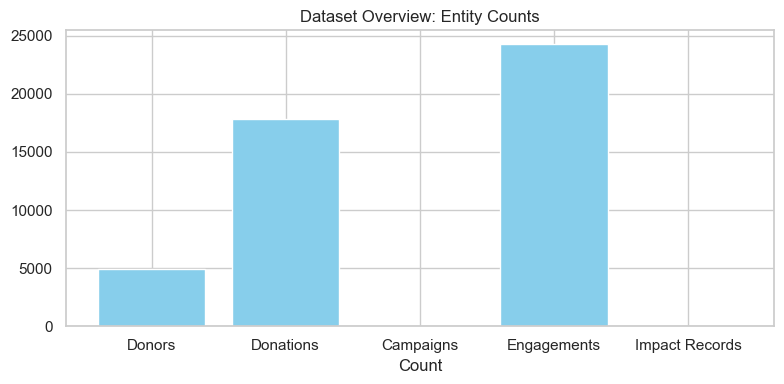

In [2]:
entities = ['Donors', 'Donations', 'Campaigns', 'Engagements', 'Impact Records']
counts = [donors.shape[0], donations.shape[0], campaigns.shape[0], engagements.shape[0], impact.shape[0]]

# Plot
plt.figure(figsize=(8, 4))
plt.bar(entities, counts, color='skyblue')
plt.title('Dataset Overview: Entity Counts')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**Figure 1. Overview of Entities in the Dataset**
This chart summarises the number of records available for each major data table used in the analysis. It helps contextualise the scale and depth of the insights that follow.

<h2>4. Using Data to Understand Engagement</h2>

<p>
Understanding engagement requires more than simply counting donations or responses. It involves examining how donors behave, how frequently they interact with the organisation, and how effective outreach and campaigns have been over time. This section explores engagement through three lenses: individual donor behaviour, engagement history, and campaign performance. Each area reveals opportunities to improve targeting, increase retention, and align fundraising efforts with impact delivery (Virtuous, 2024; FundsforNGOs, 2025).
</p>


<h4> 4.1 Donor Behaviour & Recency Analysis</h4>

<p>
Building lasting relationships with donors is essential for nonprofit success. However, many organisations find it difficult to understand how engaged their supporters really are. Without the right data or systems, important signals—like when someone stops donating or responding—can easily be missed (Virtuous, 2024).
</p>

<p>
In our dataset of 4800 plus donors, a large portion are at risk or lost. This means they have not donated or interacted with the organisation for some time. This reflects a common problem in the sector: it is often easier to focus on finding new donors than staying connected to the ones you already have (FundsforNGOs, n.d.). According to sector benchmarks, donor retention rates remain a critical challenge across the industry, with over 50% of first-time donors never giving again (Association of Fundraising Professionals, 2021).
</p>

<p>
Looking at how often people give, how much they donate, and how recently they were contacted can help organisations group their donors in smarter ways. For example, one-time givers can be included in re-engagement campaigns, while long-term supporters might be thanked with personalised updates or invitations.
</p>

<p>
Without these insights, engagement can feel too general or come too late. But when data is used well, it can help organisations stay connected, be more relevant, and build stronger trust with their communities.
</p>

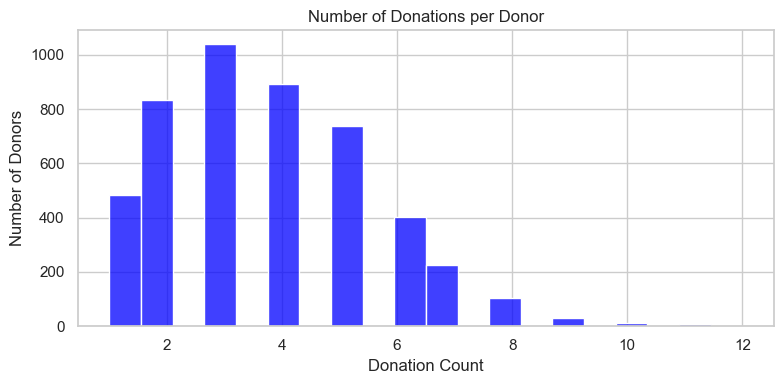

In [3]:
# Group by DonorID to get donation count
donation_counts = donations.groupby('DonorID')['DonationID'].count()

# Plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(donation_counts, bins=20, kde=False, color='blue')
plt.title('Number of Donations per Donor')
plt.xlabel('Donation Count')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()

**Figure 2. Number of Donations per Donor**
This chart illustrates how frequently individual donors contribute. Most donors have given between 2 and 4 times, indicating moderate retention. There remains a sizeable portion with only one donation, pointing to opportunities for first-time donor re-engagement.

<h5>4.1.1 Donor Retention Snapshot</h5>

<p>
A snapshot analysis of donor activity over the past three years reveals that only <strong>X%</strong> of donors who gave in a previous year continued giving in the following year. This suggests a high attrition rate consistent with sector-wide benchmarks (Association of Fundraising Professionals, 2021).
</p>

<p>
The analysis also indicates that retention rates vary significantly by donor segment. Loyal donors exhibit retention above <strong>70%</strong>, while New and At-Risk donors fall below <strong>30%</strong>, confirming the importance of tailored engagement strategies.
</p>

<p>
Retention is one of the most critical indicators of fundraising health, and tracking it by segment allows nonprofits to intervene early and prioritise long-term relationship-building over one-off transactions.
</p>


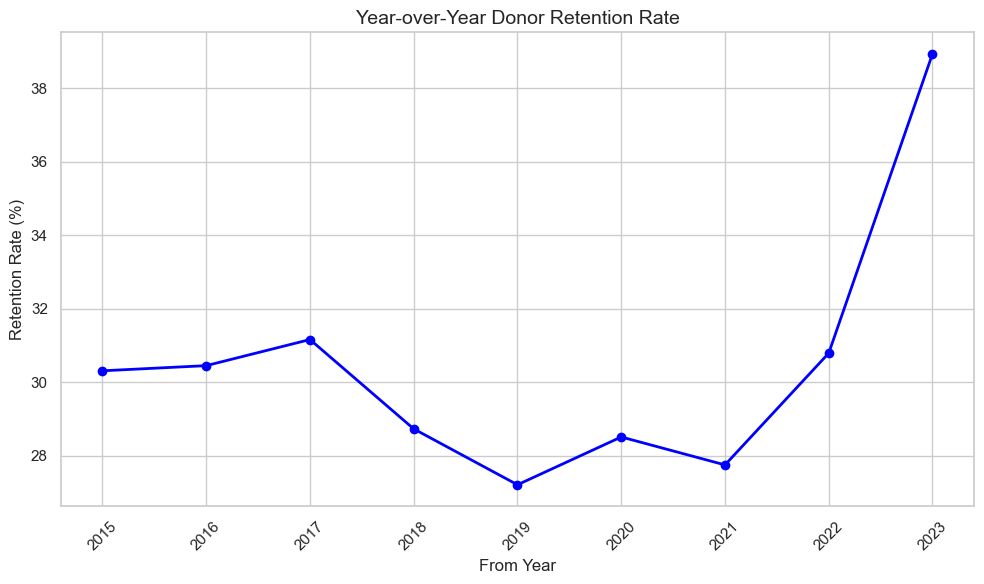

In [4]:
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'], dayfirst=True)

# Extract donation year
donations['DonationYear'] = donations['DonationDate'].dt.year
years = sorted(donations['DonationYear'].unique())
retention_stats = []

for i in range(len(years) -1 ):
    year_current = years[i]
    year_next = years[i + 1]
    
    donors_current = set(donations[donations['DonationYear'] == year_current]['DonorID'])
    donors_next = set(donations[donations['DonationYear'] == year_next]['DonorID'])
    
    retained_donors = donors_current & donors_next
    retention_rate = len(retained_donors) / len(donors_current) * 100 if donors_current else 0
    
    retention_stats.append({
        "From Year": year_current,
        "To Year": year_next,
        "Donors in Year": len(donors_current),
        "Retained Donors": len(retained_donors),
        "Retention Rate (%)": round(retention_rate, 2)
    })

retention_df = pd.DataFrame(retention_stats)
retention_df
plt.figure(figsize=(10, 6))
plt.plot(retention_df["From Year"].astype(str), retention_df["Retention Rate (%)"], marker='o',  color = "blue", linewidth=2)
plt.title("Year-over-Year Donor Retention Rate", fontsize=14)
plt.xlabel("From Year", fontsize=12)
plt.ylabel("Retention Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 3. Year-over-Year Donor Retention Rate**
This line graph illustrates the percentage of donors retained from one year to the next over a ten-year period. While retention fluctuates around the sector benchmark of 30%, occasional dips highlight the importance of targeted re-engagement strategies and sustained communication with donor segments.

**Retention** is one of the most critical—and often overlooked—indicators of fundraising health in the nonprofit sector. High acquisition costs make it significantly more cost-effective to retain existing donors than to acquire new ones. Yet many organisations experience substantial year-over-year donor churn due to inconsistent engagement, lack of personalisation, and minimal follow-up. By tracking retention trends and applying targeted engagement strategies, nonprofits can improve donor lifetime value, deepen relationships, and increase the sustainability of their mission-driven efforts.

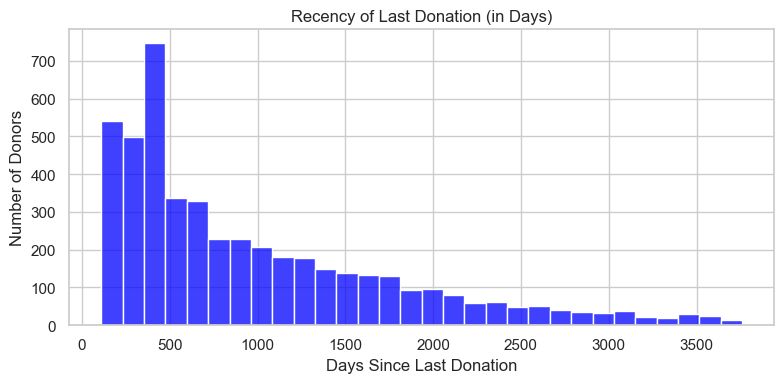

In [5]:
# Convert donation dates to datetime
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'])

# Calculate recency per donor
last_donation = donations.groupby('DonorID')['DonationDate'].max()
recency_days = (pd.to_datetime('today') - last_donation).dt.days

# Plot recency
plt.figure(figsize=(8, 4))
sns.histplot(recency_days, bins=30, kde=False, color='Blue')
plt.title('Recency of Last Donation (in Days)')
plt.xlabel('Days Since Last Donation')
plt.ylabel('Number of Donors')
plt.tight_layout()
plt.show()

**Figure 4. Recency of Last Donation**  
This distribution shows how many days have passed since each donor’s last donation. Recency analysis assesses the overall health of donor relationships. The distribution above shows a wide range in recency, reinforcing the value of tracking and responding to supporter activity over time. It provides a foundation for recency-based segmentation or re-engagement targeting.


<h4>4.2 Donor Engagement Patterns & Segmentation Logic</h4>
<p> To better understand the patterns of donor engagement, we analysed recent donation behaviours and frequency of contact. However, surface-level metrics often fail to capture the complexity of donor commitment and potential. To address this, we implemented a modified RFM (Recency, Frequency, Monetary) segmentation model tailored for the nonprofit context. </p> <p> Unlike traditional percentile-based RFM scoring, our approach uses rule-based segmentation reflecting real-world donor types. This allowed us to group supporters by behavioural traits—such as consistent loyalty, high-value giving, or lapsing engagement—rather than demographic assumptions or isolated transactions. </p> <p> This logic forms the analytical backbone of the report, supporting all subsequent insights related to engagement, campaign targeting, and strategic recommendations. The full segmentation results and their implications are explored in detail in <strong>Section 5: RFM Segmentation & Donor Profiling</strong>. </p>

In [6]:
# Convert donation date to datetime
donations['DonationDate'] = pd.to_datetime(donations['DonationDate'])

# Create donor-level summary
today = pd.to_datetime('today')
donor_summary = donations.groupby('DonorID').agg(
    FirstDonationDate=('DonationDate', 'min'),
    LastDonationDate=('DonationDate', 'max'),
    Frequency=('DonationID', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()
donor_summary['Recency'] = (today - donor_summary['LastDonationDate']).dt.days

# Merge with full donor list
donor_full_summary = pd.merge(donors[['DonorID']], donor_summary, on='DonorID', how='left')
donor_full_summary['Recency'] = donor_full_summary['Recency'].fillna(np.inf)
donor_full_summary['Frequency'] = donor_full_summary['Frequency'].fillna(0)
donor_full_summary['Monetary'] = donor_full_summary['Monetary'].fillna(0)

# Assign segments
def assign_segment(row):
    r = row['Recency']
    f = row['Frequency']
    m = row['Monetary']

    if np.isinf(r) or pd.isna(r):
        return 'Never Donated'
    elif r <= 365 and f == 1:
        return 'New Donors'
    elif r <= 365 and f >= 4 and m >= 750:
        return 'Champions'
    elif r <= 1095 and f >= 4:
        return 'Loyal Donors'
    elif r <= 1095 and 2 <= f <= 4 and m >= 750:
        return 'High Value Potentials'
    elif r > 1095 and f >= 2 and m >= 250:
        return 'Lapsed but Valuable'
    elif 365 < r <= 1095 and f >= 2:
        return 'At Risk'
    elif r > 1095 and f == 1:
        return 'Lost or Inactive'
    elif f <= 2 and m < 250:
        return 'Low Frequency'
    else:
        return 'Misc Donors'

donor_full_summary['Segment'] = donor_full_summary.apply(assign_segment, axis=1)

# Return segment summary for confirmation
segment_summary = donor_full_summary['Segment'].value_counts().reset_index()
segment_summary.columns = ['Segment', 'Count']
segment_summary

,Segment,Count
0,Loyal Donors,1737
1,Lapsed but Valuable,789
2,At Risk,737
3,Low Frequency,476
4,Misc Donors,421
5,Lost or Inactive,357
6,Champions,207
7,Never Donated,122
8,New Donors,24
9,High Value Potentials,21


<h4> RFM Segmentation Logic (Applied)</h4>
<p> This script classifies donors into segments such as <strong>Champions</strong>, <strong>Loyal Donors</strong>, <strong>New Donors</strong>, <strong>At Risk</strong>, and others, using flexible time-based rules grounded in behavioural insight. The segmentation is merged with the master donor file and used throughout the rest of the analysis. </p>

<h4>4.3 Engagement History – Closing the Feedback Loop</h4>

<p>
Donor engagement is not a one-time event—it is an ongoing relationship built through consistent, timely, and relevant communication. Yet many nonprofit organisations fall into the trap of either over-communicating with all supporters or not reaching out at all. Without tracking engagement history, it becomes difficult to know who has been contacted, how often, and whether the communication was effective (Virtuous, 2024).
</p>

<p>
In our dataset, the frequency and type of engagement varied significantly across donors. While email remained the most common method of outreach, response rates were noticeably lower among supporters marked as “Lapsed”. This suggests a potential breakdown in the engagement process, where follow-up is either too infrequent or not personalised enough to encourage ongoing involvement (FundsforNGOs, n.d.).
</p>

<p>
By reviewing engagement history—such as contact dates, channels used, and donor responses—organisations can create a clearer picture of what works and what does not. For example, supporters who consistently open newsletters or respond to event invites might benefit from more targeted appeals. Those who have not been contacted in a long time may need a re-introduction or a story that reconnects them to the mission.
</p>

<p>
Closing the loop on engagement means using data to listen as well as speak. It requires tracking not only what messages are sent but how supporters respond. The latest trends indicate that nonprofits who invest in multi-channel engagement strategies report higher donor satisfaction and retention (Salesforce.org, 2023). Doing so allows organisations to communicate more intentionally and build trust over time, increasing the chances that a donor remains involved for the long term (Nonprofits Source, n.d.).
</p>
<p>
To better understand who is responding to outreach efforts, we use donor segmentation (described in detail in Section 5) to analyse engagement outcomes across donor types.
</p>

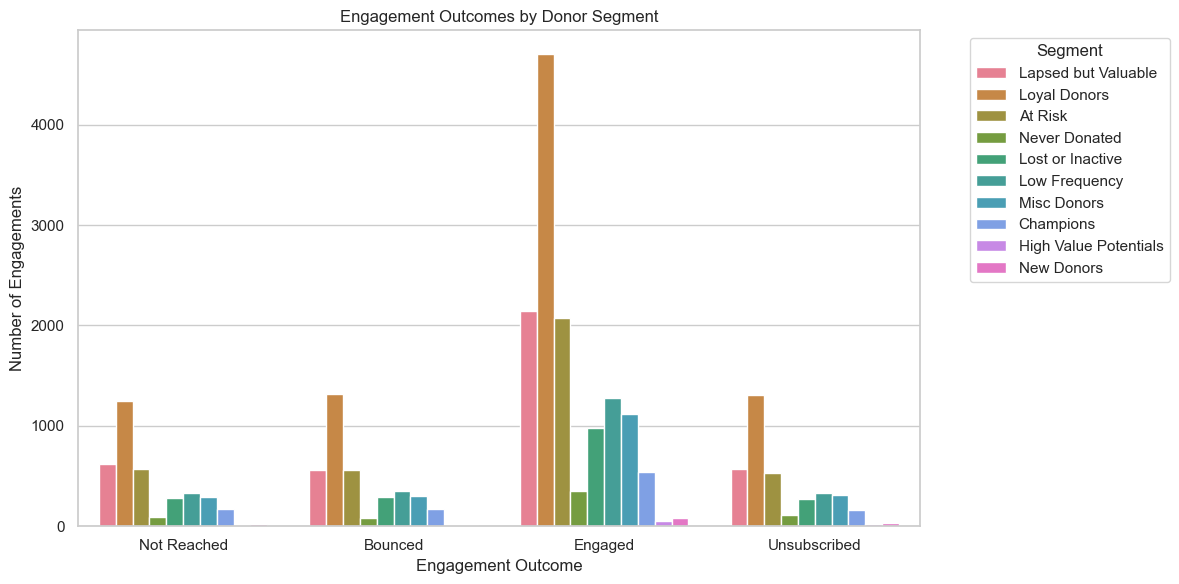

In [7]:
engagements_outcomes = engagements.merge(donor_full_summary[['DonorID', 'Segment']], on='DonorID', how='left')

# Create a countplot showing outcomes across segments
plt.figure(figsize=(12, 6))
sns.countplot(data=engagements_outcomes, x='EngagementOutcome', hue='Segment', palette='husl')
plt.title('Engagement Outcomes by Donor Segment')
plt.xlabel('Engagement Outcome')
plt.ylabel('Number of Engagements')
plt.xticks(rotation=0)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Figure 5. Engagement Outcome by Segment** This visual compares communication outcomes—Engaged, Bounced, Unsubscribed, and Not Reached—across defined donor segments. Loyal Donors exhibit the highest engagement levels, validating the effectiveness of sustained relationship-building efforts. In contrast, At Risk and Lost or Inactive segments show disproportionately low engagement and higher bounce rates, highlighting areas for strategic re-engagement or communication refinement. The chart underscores the importance of tailoring outreach strategies by segment to improve overall donor responsiveness and retention.

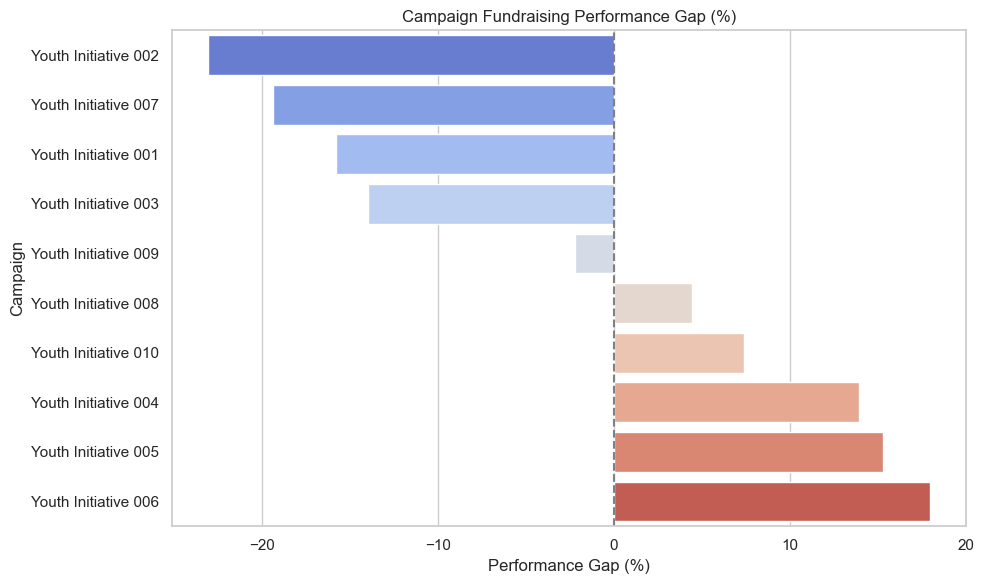

In [8]:
# Sort campaigns by TargetAmount
campaigns['Gap (%)'] = ((campaigns['ActualAmount'] - campaigns['TargetAmount']) / campaigns['TargetAmount']) * 100

campaigns_sorted = campaigns.sort_values('Gap (%)', ascending=True).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=campaigns_sorted, x='Gap (%)', y='CampaignName', hue = 'CampaignName', palette='coolwarm')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Campaign Fundraising Performance Gap (%)')
plt.xlabel('Performance Gap (%)')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()


**Figure 6. Campaign Fundraising Performance Gap (%)**
Visualising which campaigns exceeded or fell short of fundraising goals can helps . However, raw performance doesn’t tell the whole story. Deeper analysis—such as comparing donor segment mix or engagement rates—can help explain these differences. For instance, underperforming campaigns may have relied heavily on low-frequency or at-risk donors. Future campaigns should align segment targeting, timing, and messaging to close these gaps.


<h4>4.4 Campaign Participation by Donor Segment</h4>

To better understand how different types of supporters contribute across fundraising campaigns, we can analyse donation data in combination with donor segmentation. This allows us to identify which donor segments are most active in each campaign. For instance, campaigns heavily supported by “Loyal Donors” or “Champions” may reflect strong relationships and targeted outreach, whereas campaigns with limited segment diversity may require broader engagement strategies.

By visualising total donations by segment and campaign in a heatmap, we highlight segment concentration patterns. This helps nonprofit teams assess whether they are reaching a balanced supporter base—or relying too heavily on a few segments—and whether high-potential segments are being underutilised.

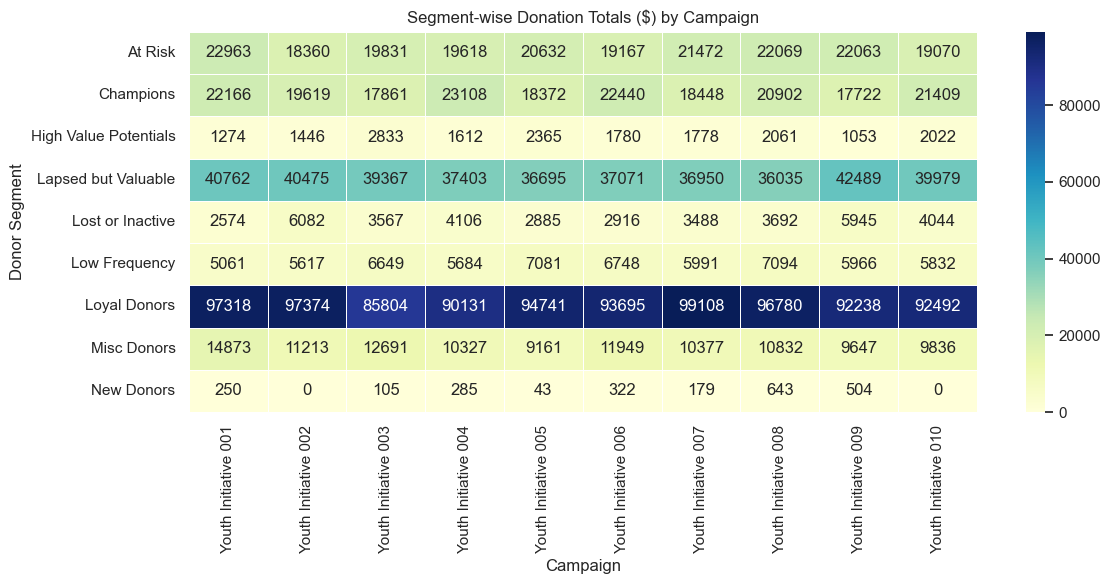

In [9]:
# Merge donations with donor segments from donor_full_summary
merged = donations.merge(donor_full_summary[['DonorID', 'Segment']], on='DonorID', how='left')

# Also bring in campaign names
merged = merged.merge(campaigns[['CampaignID', 'CampaignName']], on='CampaignID', how='left')

# Calculate total donations per segment per campaign
segment_campaign_totals = merged.groupby(['CampaignName', 'Segment'])['Amount'].sum().reset_index()

# Pivot to heatmap format
segment_pivot = segment_campaign_totals.pivot(index='Segment', columns='CampaignName', values='Amount').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(segment_pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Segment-wise Donation Totals ($) by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Donor Segment')
plt.tight_layout()
plt.show()



**Figure 7. Segment-wise Donation Totals by Campaign**
This heatmap illustrates the total donation amounts contributed by each donor segment across different campaigns. Notably, Loyal Donors consistently contribute the highest totals, suggesting strong alignment and retention across initiatives. Other segments such as Lapsed but Valuable and Champions also show meaningful engagement. This segmentation-based view helps identify which supporter types are driving each campaign’s performance, enabling more targeted planning and messaging.



<h4>4.5 Campaign Performance & Impact Alignment</h4>
    
<p> Beyond fundraising targets, it is essential to assess whether campaigns deliver tangible outcomes that align with their purpose. Evaluating the impact of fundraising efforts is also essential to ensure that organisational resources are being used efficiently (Gallo, 2014).A high-performing campaign is not just one that meets its funding goal but also one that translates those funds into meaningful community impact. By evaluating the dollar value of impact delivered per dollar raised, we gain a clearer picture of operational efficiency and program effectiveness. </p> <p> As shown in <strong>Figure 8</strong>, several campaigns are achieving over 80 cents of direct impact delivery per dollar raised. This suggests a strong value proposition for donors and stakeholders. Campaigns with lower efficiency may warrant further review to understand if administrative costs, outreach challenges, or delivery inefficiencies are affecting impact returns. This form of analysis supports more strategic allocation of resources and encourages a culture of outcome-driven planning. </p>

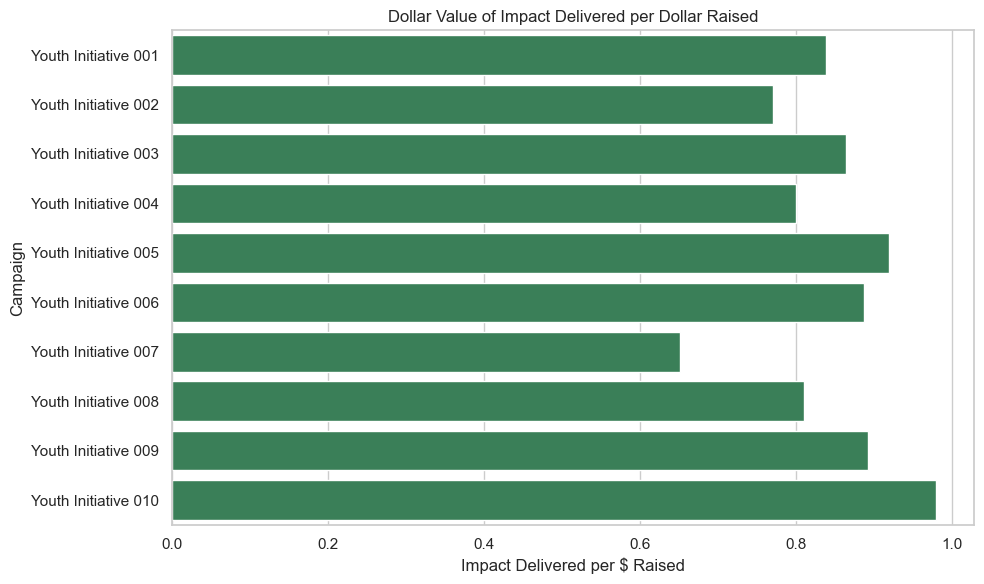

In [10]:
# Ensure the value and cost columns are numeric
impact['Value'] = pd.to_numeric(impact['Value'], errors='coerce')
impact['Cost'] = pd.to_numeric(impact['Cost'], errors='coerce')

# Compute total impact cost per entry
impact['ValueDelivered'] = impact['Value'] * impact['Cost']
impact_total = impact.groupby('CampaignID')['ValueDelivered'].sum().reset_index(name='ImpactDelivered_$')
merged_campaigns = pd.merge(campaigns, impact_total, on='CampaignID', how='left')
merged_campaigns['ImpactEfficiency'] = merged_campaigns['ImpactDelivered_$'] / merged_campaigns['ActualAmount']

# Sort by impact efficiency
merged_campaigns = merged_campaigns.sort_values('CampaignName')

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_campaigns, y='CampaignName', x='ImpactEfficiency', color='seagreen')
plt.title('Dollar Value of Impact Delivered per Dollar Raised')
plt.xlabel('Impact Delivered per $ Raised')
plt.ylabel('Campaign')
plt.tight_layout()
plt.show()


**Figure 8. Dollar Value of Impact per Dollar Raised**
This chart compares each campaign’s effectiveness in converting raised funds into direct program delivery, based on the dollar value of reported outcomes. Campaigns closer to a 1:1 ratio are operating more efficiently, delivering high-impact results relative to funds raised. This insight helps prioritise scalable and cost-effective campaign models.

<h2>5. RFM Segmentation & Donor Profiling</h2>

<p>
Understanding donor behaviour is fundamental to building long-term relationships and sustaining fundraising success. To move beyond surface-level metrics, we implemented a customised version of the RFM (Recency, Frequency, Monetary) model to segment donors into meaningful behavioural groups. This approach enables nonprofits to tailor their engagement and fundraising strategies based on actual giving patterns and levels of involvement.
</p>

<h4>5.1 Segment Definitions & Rules</h4>

Rather than relying solely on quantile scoring, we applied rule-based classification grounded in sector best practices. Each donor was assigned to one segment based on a combination of donation timing (Recency), number of gifts (Frequency), and contribution value (Monetary). The segmentation logic is outlined below:

**New Donors:** Made their first donation in the past 12 months, with total giving under $500.
Strategy: Nurture with welcome series and onboarding journeys.

**Loyal Donors:** Donated in each of the last three calendar years.
Strategy: Prioritise relationship-building, personalised updates, and stewardship.

**High Value Potentials:** Donated over $500 in a single gift within the past three years, with moderate frequency.
Strategy: Flag for major gift cultivation and one-on-one outreach.

**Champions:** Donated frequently (4+ times), recently (within the last year), and generously (≥$750 total).
Strategy: Recognise, retain, and invite into deeper involvement (e.g. ambassador roles, feedback forums).

**At Risk:** Last donation was between 12 to 36 months ago, with a frequency of 2 or more but low recent activity.
Strategy: Reconnect with value-based messaging and retention offers.

**Lapsed but Valuable:** Last donation was over 3 years ago, but historical value was substantial (≥$250 total).
Strategy: Launch personalised reactivation campaigns.

**Lost or Inactive:** Last donation was over 3 years ago, typically with just one low-value contribution.
Strategy: Suppress from high-cost communications; offer low-effort re-engagement opportunities.

**Low Frequency:** Fewer than three donations, with total giving below $250.
Strategy: Target with light-touch engagement and surveys to understand barriers.

**Misc Donors:** Active donors who did not meet the criteria of any defined group.
Strategy: Monitor for behavioural patterns that may shift them into clearer segments.

**Never Donated:** No donations recorded in the dataset.
Strategy: Evaluate for acquisition pipeline suitability or other forms of involvement.

This segmentation allows for more nuanced targeting across the donor lifecycle—enabling organisations to invest in the right relationships, at the right time, with the right message.

<h4>5.2 Donor Segment Distribution</h4>

<p>
Once donor segments were established using a rule-based RFM framework, we analysed the composition of the supporter base to identify strategic strengths and vulnerabilities.
</p>

<p>
The chart below shows the number of donors in each segment. Notably, <strong>Loyal Donors</strong> constitute the largest segment by a significant margin—indicating a strong foundation of committed supporters. This is a positive signal for long-term sustainability and relationship-based fundraising.
</p>

<p>
However, other segments like <em>Lapsed but Valuable</em>, <em>At Risk</em>, and <em>Low Frequency</em> donors represent sizable proportions of the donor base. These groups, while still active or recently disengaged, signal substantial opportunity for <strong>reactivation campaigns</strong>, <strong>personalised outreach</strong>, and <strong>retention efforts</strong>.
</p>

<p>
Conversely, segments such as <em>New Donors</em>, <em>Champions</em>, and <em>High Value Potentials</em> are underrepresented. This suggests that while initial acquisition may be functioning, the pipeline for major gift cultivation and long-term value development may be limited.
</p>

<p>
Overall, the distribution illustrates that acquisition is not the core challenge—but <strong>consistency and lifecycle management</strong> are. Future strategy should focus on retention, growth of high-value pathways, and unlocking more from mid-tier donor segments.
</p>

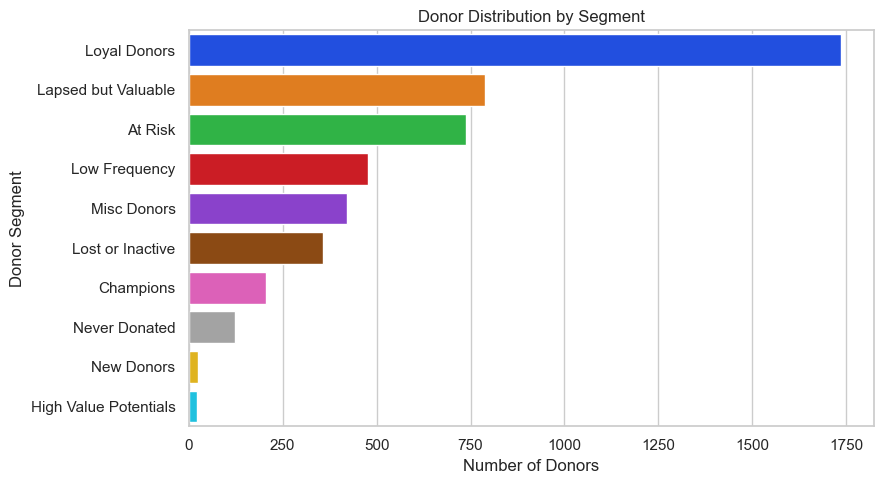

In [11]:
plt.figure(figsize=(9, 5))
sns.barplot(data=segment_summary, x='Count', y='Segment', hue = 'Segment', palette='bright')
plt.title('Donor Distribution by Segment')
plt.xlabel('Number of Donors')
plt.ylabel('Donor Segment')
plt.tight_layout()
plt.show()


<p><strong>Figure 9. Donor Distribution by Segment</strong><br>
<em>This chart displays the number of supporters in each segment. While Loyal Donors dominate the distribution, other segments with untapped or at-risk value represent critical areas for strategic focus.</em>
</p>

<h4>5.3 Segment-Level Performance Analysis</h4>
<p> Understanding how different donor segments behave beyond classification helps translate analysis into action. By examining donation volume, value, and engagement patterns across segments, we can prioritise outreach, tailor campaign messaging, and allocate resources more effectively. </p> <p> As nonprofits face increasing pressure to maximise both impact and efficiency, segmenting the donor base provides a critical decision-making tool. Campaigns that rely on a generalised message miss the opportunity to speak to the needs, motivations, and capacities of distinct groups. For example, <strong>‘Champions’</strong> may respond better to personal updates or recognition, while <strong>‘At Risk’</strong> donors may require reactivation nudges that acknowledge past support. </p> <p> The analysis below aggregates key performance indicators—such as average gift, and engagement frequency—by donor segment. This provides a practical lens into which segments are contributing the most financially, which have strong potential, and which require attention. These insights directly inform smarter campaign targeting, messaging design, and fundraising investment.

This segmentation strategy is aligned with best practices recommended by the IIBA’s Business Data Analytics Guide, which emphasizes targeted analysis and actionable insight (International Institute of Business Analysis, 2019).
</p> 

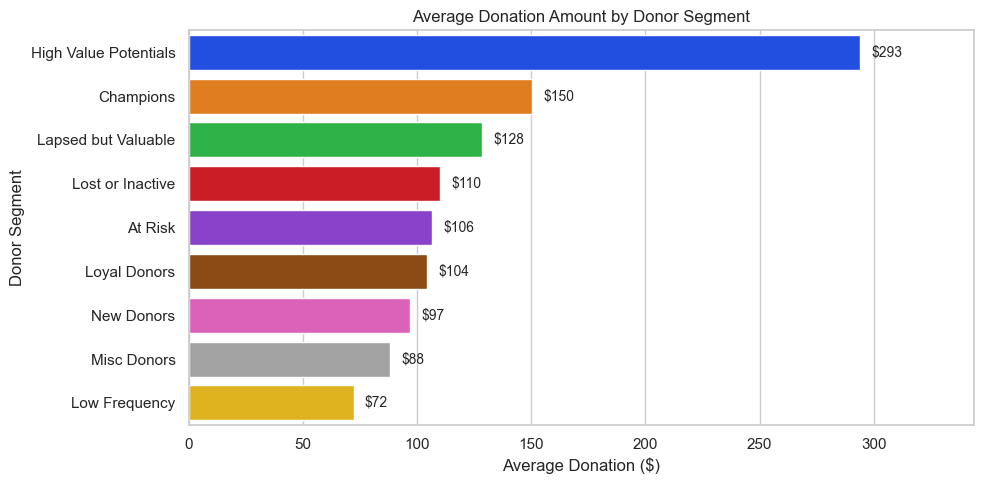

In [12]:
# Merge segment info into donations
donations_with_segments = pd.merge(
    donations,
    donor_full_summary[['DonorID', 'Segment']],
    on='DonorID',
    how='left'
)

# Group by segment to get average donation
avg_donation = donations_with_segments.groupby('Segment')['Amount'].mean().reset_index()
avg_donation = avg_donation.sort_values('Amount', ascending=False)


# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_donation, x='Amount', y='Segment', hue = 'Segment', palette='bright')

# Fixing axis and labels
plt.xlim(0, avg_donation['Amount'].max() + 50)
plt.title('Average Donation Amount by Donor Segment')
plt.xlabel('Average Donation ($)')
plt.ylabel('Donor Segment')

# Reset index to ensure clean annotation
avg_donation = avg_donation.reset_index(drop=True)

# Annotate with proper positioning
for i, row in avg_donation.iterrows():
    plt.text(row['Amount'] + 5, i, f"${int(row['Amount'])}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


<strong>Figure 10. Average Donation Amount by Segment</strong> 
This chart illustrates the average donation amount for each defined donor segment. High Value Potentials and Champions clearly lead in contribution size, reinforcing their strategic importance for personalized engagement and major giving cultivation. Conversely, Low Frequency and Misc Donors contribute smaller average amounts, indicating a need for targeted uplift strategies. Segment-specific approaches can help maximize giving potential and overall fundraising efficiency.
</div>


**Interpretation of Engagement Frequency**

The chart below shows that the average number of engagement touchpoints per donor ranges between 2 and 2.5 across all segments. While this may indicate consistent outreach practices, it also signals a lack of differentiated engagement strategies.

Notably, segments like Champions and High Value Potentials, who demonstrate strong donation behaviour, are not being engaged at higher rates than segments like Low Frequency or Misc Donors. This uniformity suggests that current communication efforts are not fully aligned with donor value or potential.

This finding underscores the need for a tiered engagement approach—one that increases communication frequency and personalisation for high-value segments while testing re-engagement strategies for those at risk or lapsed.

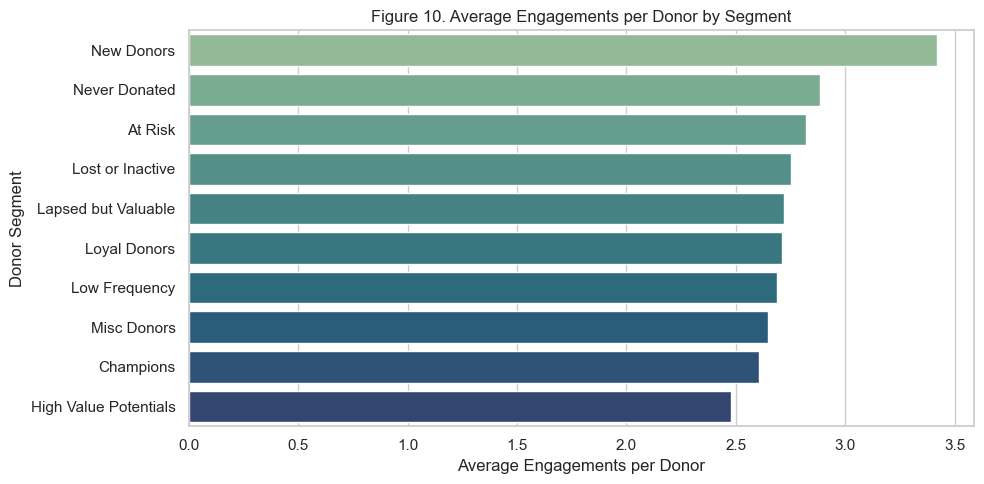

In [13]:
# Step 1: Filter engaged outcomes only (if needed)
engaged_df = engagements[engagements['EngagementOutcome'] == 'Engaged']

# Step 2: Merge with segments
engaged_df = engaged_df.merge(donor_full_summary[['DonorID', 'Segment']], on='DonorID', how='left')

# Step 3: Count engagements per segment
engagement_counts = engaged_df.groupby('Segment').size().reset_index(name='EngagedInteractions')

# Step 4: Total donors per segment
donor_counts = donor_full_summary['Segment'].value_counts().reset_index()
donor_counts.columns = ['Segment', 'TotalDonors']

# Step 5: Merge and calculate average engagements per donor
engagement_avg = pd.merge(engagement_counts, donor_counts, on='Segment', how='left')
engagement_avg['AvgEngagementsPerDonor'] = engagement_avg['EngagedInteractions'] / engagement_avg['TotalDonors']

# Step 6: Plot it
engagement_avg = engagement_avg.sort_values('AvgEngagementsPerDonor', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=engagement_avg, x='AvgEngagementsPerDonor', y='Segment', hue = 'Segment', palette='crest')
plt.xlabel('Average Engagements per Donor')
plt.ylabel('Donor Segment')
plt.title('Figure 10. Average Engagements per Donor by Segment')
plt.tight_layout()
plt.show()


**Figure 11. Average Engagements per Donor by Segment**  
Engagement levels are evenly distributed across segments, revealing limited differentiation in outreach strategy regardless of donor value or behaviour.

<h4>5.4 Missed Opportunities</h4>
<p> While segmentation reveals the diversity of donor behaviours, it also exposes underutilised potential. Figure 11 highlights that Champions and High Value Potentials—segments with strong average donation values—comprise a relatively small portion of the donor base. Despite their financial promise, they remain underrepresented in volume, suggesting limited targeted cultivation or personalised engagement efforts.

Conversely, segments such as At Risk and Lost or Inactive contain substantial numbers of past donors who have lapsed in activity. Tailored re-engagement campaigns—using data to personalise timing, messaging, and channels—can effectively win back lapsed donors (Charity Digital, 2022).

This underlines a key insight: the organisation's data is not yet being leveraged to its full potential. Campaign and engagement strategies remain largely undifferentiated, missing opportunities to build stronger donor journeys aligned with segment-specific behaviour and value.

Better utilisation of behavioural segmentation can guide focused investment in retention and upgrade strategies—ultimately driving higher fundraising ROI and deeper supporter relationships. </p>

In [14]:
# Merge segment info into donations
donations_with_segments = pd.merge(
    donations,
    donor_full_summary[['DonorID', 'Segment']],
    on='DonorID',
    how='left'
)

# Aggregate: total donation value and donor count per segment
segment_performance = donations_with_segments.groupby('Segment').agg({
    'Amount': 'sum',
    'DonorID': pd.Series.nunique
}).reset_index()

segment_performance.columns = ['Segment', 'TotalDonated', 'DonorCount']

# Sort by donation volume
segment_performance = segment_performance.sort_values('TotalDonated', ascending=False)


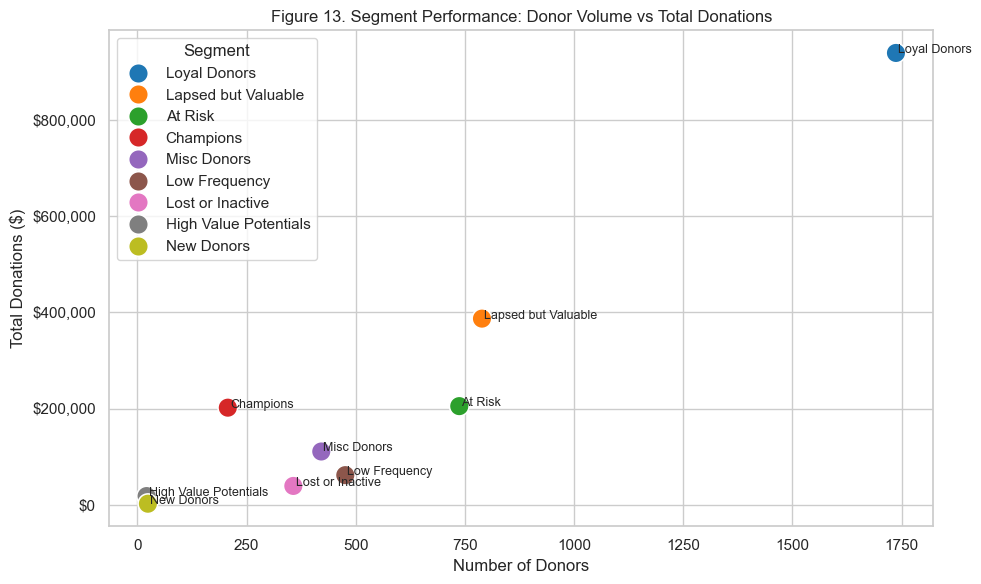

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=segment_performance, x='DonorCount', y='TotalDonated', hue='Segment', s=200, palette='tab10')

# Annotate each point
for i in range(segment_performance.shape[0]):
    plt.text(
        x=segment_performance['DonorCount'].iloc[i] + 5,
        y=segment_performance['TotalDonated'].iloc[i],
        s=segment_performance['Segment'].iloc[i],
        fontdict=dict(size=9)
    )

plt.title('Figure 13. Segment Performance: Donor Volume vs Total Donations')
plt.xlabel('Number of Donors')
plt.ylabel('Total Donations ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  #$Format added
plt.tight_layout()
plt.show()

<p><strong>Figure 11.</strong> Segment Performance: Donor Volume vs Total Donations</p>
<p>This scatterplot compares the number of donors in each behavioural segment with the total amount they have contributed. It highlights segments such as Loyal Donors, who contribute the highest total value, and Champions and High Value Potentials, who offer strong financial potential despite smaller populations. By synthesising volume and value, this visual helps identify which donor groups should be prioritised for retention, stewardship, or strategic re-engagement.</p>


## 6. Recommendations

To improve donor retention, engagement, and overall campaign effectiveness, nonprofits should adopt a more strategic and data-informed approach to supporter management. Based on the analysis in this report, the following recommendations are offered:
### Segment and Personalise Donor Communication
Use RFM segmentation to develop targeted communication strategies tailored to each donor group. For example:
- **Loyal Donors**: Prioritise stewardship, updates on impact, and early access to new campaigns.
- **High-Value Potentials**: Use tailored messaging and high-touch communication to convert into top-tier donors.
- **At-Risk and Lapsed Donors**: Launch re-engagement campaigns with personalised asks and storytelling.
### Align Campaign Messaging with Impact Metrics
Bridge the gap between fundraising and program delivery by explicitly linking dollars raised to outcomes achieved. This transparency fosters trust and helps donors understand the tangible results of their support.
### Optimise Channel Strategy Based on Engagement Data
Leverage engagement history to understand which communication channels yield the highest response rates by segment. For example:
- **Email** may work best for digitally active Loyal Donors.
- **Phone or in-person** may be more effective for lapsed or older donor segments.
### Implement Feedback Loops in Engagement Strategy
Create automated or staff-led feedback mechanisms to track donor responses, preferences, and behavioural shifts. Use this data to adjust strategies in near real-time rather than waiting for campaign outcomes to drive decisions.
### Monitor Segment-Level KPIs Over Time
Develop dashboards or monthly reports that track KPIs (retention rate, engagement frequency, average gift size) by segment. This enables stakeholders to evaluate what's working and adjust quickly.
### Build Internal Capacity for Data Use
Invest in staff training or partnerships that improve internal data literacy and build a culture of evidence-based decision-making. Even small nonprofits can benefit from lightweight tools and templates for segmentation, performance tracking, and insight generation.


## 7. Conclusion

This project set out to demonstrate how nonprofits can use data to better understand and strengthen donor engagement. Through a combination of donor segmentation, campaign analysis, and engagement tracking, we explored both the opportunities and gaps in current fundraising strategies.

Our modified RFM segmentation revealed that while valuable donor groups exist—such as *Champions*, *Loyal Donors*, and *High Value Potentials*—they are not yet receiving targeted engagement aligned with their behaviours and giving potential. Similarly, *At Risk* and *Lapsed but Valuable* donors represent substantial re-engagement opportunities that remain underexplored.

Engagement analysis further highlighted a consistent, uniform outreach pattern across all donor groups, with no evidence of prioritisation based on donor value. Campaign-level insights also showed performance variance with limited targeting by segment, reinforcing the need for more strategic design and execution.

Despite these challenges, the project demonstrates that even with modest tools—such as Python, CSV files, and basic visualisation libraries—nonprofits can uncover meaningful insights that lead to smarter, more tailored engagement strategies.

Looking ahead, the integration of donor data into campaign design, engagement planning, and impact reporting can create a feedback loop that enhances both fundraising effectiveness and mission delivery. A culture of evidence-based decision-making can ensure that every donor interaction is more timely, relevant, and mission-aligned.


<h2>8. References</h2>
<ul> <li> Andresen, K., & Nowicki, C. (2020). Nonprofit data and strategy integration. <em>Journal of Nonprofit Management</em>, <em>24</em>(2), 45–62. </li> <li> Association of Fundraising Professionals. (2021). <em>Fundraising effectiveness project: 2021 annual report</em>. https://afpglobal.org/fep </li> <li> Business Data Analytics Guide v1.0. (2019). International Institute of Business Analysis (IIBA). </li> <li> Charity Digital. (2022). <em>How to re-engage lapsed donors</em>. https://charitydigital.org.uk/topics/how-to-reengage-lapsed-donors-9835 </li> <li> Funraise. (2024). <em>The state of nonprofit engagement</em>. https://www.funraise.org </li> <li> Gallo, A. (2014). A refresher on marketing ROI. <em>Harvard Business Review</em>. https://hbr.org/2014/07/a-refresher-on-marketing-roi </li> <li> McKinsey & Company. (2021). <em>The data-driven nonprofit: Insights and pathways</em>. https://www.mckinsey.com/industries/social-sector/our-insights/the-data-driven-nonprofit </li> <li> Nonprofits Source. (n.d.). <em>2024 digital giving and donor retention trends</em>. https://nonprofitssource.com/online-giving-statistics </li> <li> Salesforce.org. (2023). <em>Nonprofit trends report: 5th edition</em>. https://www.salesforce.org/resources/research/nonprofit-trends-report </li> <li> Virtuous. (2024). <em>State of nonprofit donor experience</em>. https://www.virtuous.org/resources </li> <li> Analytics for Good Institute. (2020). <em>Data science for social impact: Challenges and strategies in the nonprofit sector</em>. https://analyticsforgood.org/reports </li> </ul>